## Introduction

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

## Data Dictionary

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

    market_id : integer id for the market where the restaurant lies
    created_at : the timestamp at which the order was placed
    actual_delivery_time : the timestamp when the order was delivered
    store_primary_category : category for the restaurant
    order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
    total_items subtotal : final price of the order
    num_distinct_items : the number of distinct items in the order
    min_item_price : price of the cheapest item in the order
    max_item_price : price of the costliest item in order
    total_onshift_partners : number of delivery partners on duty at the time order was placed
    total_busy_partners : number of delivery partners attending to other tasks
    total_outstanding_orders : total number of orders to be fulfilled at the moment


In [1]:
import numpy as np
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score



#all imports
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os
import datetime 
from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Dense, Input, Activation, Dropout, BatchNormalization

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
# Data Shape
print(f'The Number of Rows in the Dataset = {df.shape[0]}, and the number of columns = {df.shape[1]}')

The Number of Rows in the Dataset = 197428, and the number of columns = 14


In [4]:
# Datatypes and Null Value Counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [5]:
# Checking Null Values
df.isnull().sum(axis = 0)

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

## EDA and Feature Engineering

In [6]:
# Converting the Time Columns to DateTime Format
# Extracting time features from Created at column
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60.0
df['hour_of_day_created'] = df['created_at'].dt.hour
df['day_of_week_created'] = df['created_at'].dt.dayofweek
df['month_created_at'] = df['created_at'].dt.month
df['year_created_at'] = df['created_at'].dt.year

In [7]:
df.shape

(197428, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

In [9]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'delivery_time', 'hour_of_day_created',
       'day_of_week_created', 'month_created_at', 'year_created_at'],
      dtype='object')

In [10]:
#Droping NA from Delivery time and Market id
df.dropna(subset=['delivery_time'],inplace=True)
df.dropna(subset=['market_id'],inplace=True)

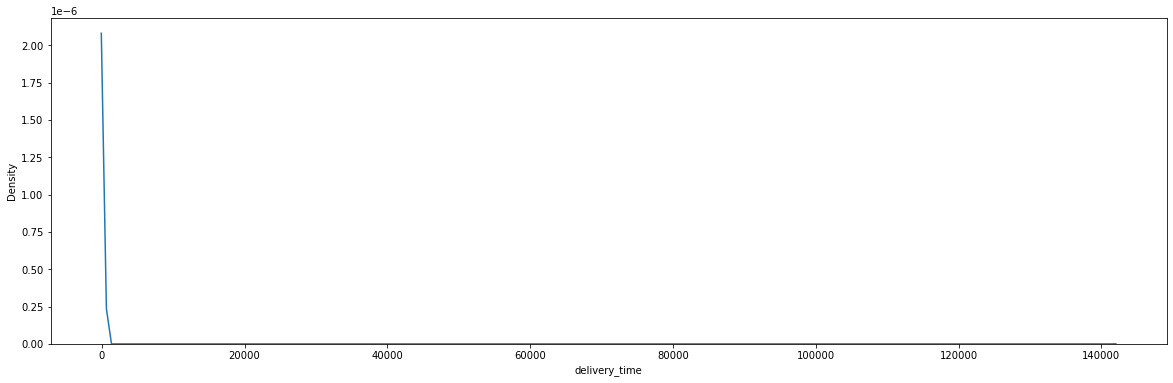

In [11]:
plt.figure(figsize=(20, 6)) 
sns.kdeplot(df['delivery_time'])
plt.show()

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='market_id', ylabel='count'>

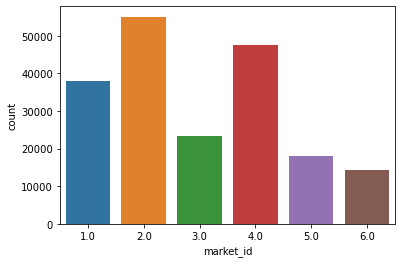

In [12]:
sns.countplot(df['market_id'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='market_id', ylabel='delivery_time'>

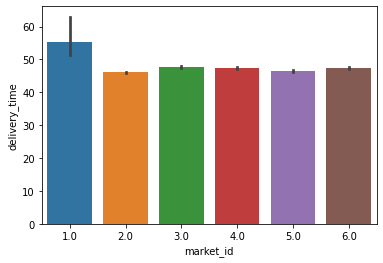

In [13]:
sns.barplot(df['market_id'],df['delivery_time'],estimator=np.mean)

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='market_id', ylabel='total_outstanding_orders'>

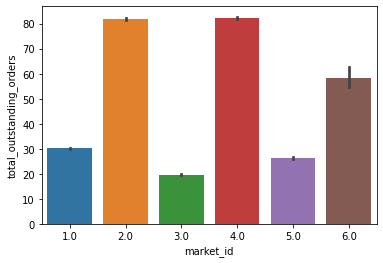

In [14]:
sns.barplot(df['market_id'],df['total_outstanding_orders'],estimator=np.mean)

In [15]:
df['store_primary_category'].groupby(df['market_id']).nunique()

market_id
1.0    70
2.0    64
3.0    65
4.0    65
5.0    59
6.0    62
Name: store_primary_category, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='created_at', ylabel='count'>

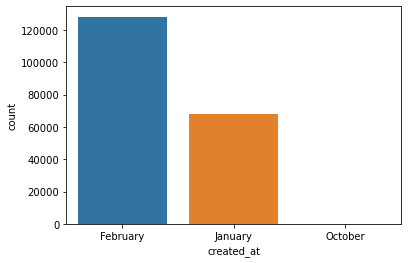

In [16]:
sns.countplot(df['created_at'].dt.month_name())

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual_delivery_time', ylabel='count'>

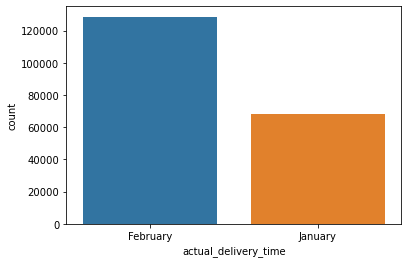

In [17]:
sns.countplot(df['actual_delivery_time'].dt.month_name())

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


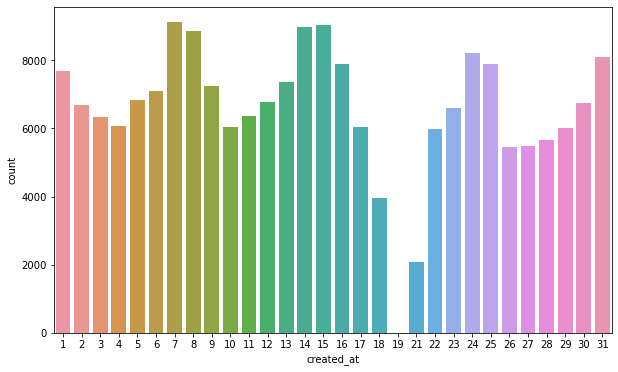

In [18]:
plt.figure(figsize=(10, 6)) 
sns.countplot(df['created_at'].dt.day)
plt.show()

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


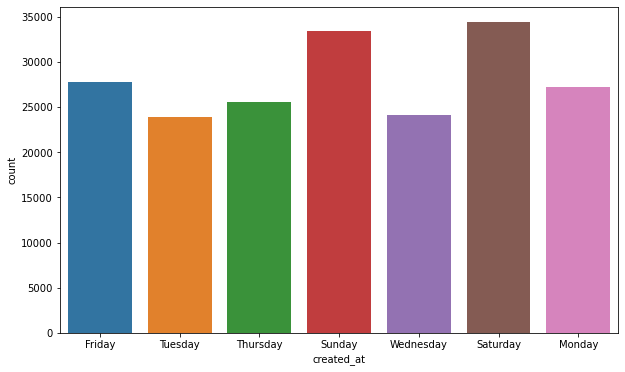

In [19]:
plt.figure(figsize=(10, 6)) 
sns.countplot(df['created_at'].dt.day_name())
plt.show()

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


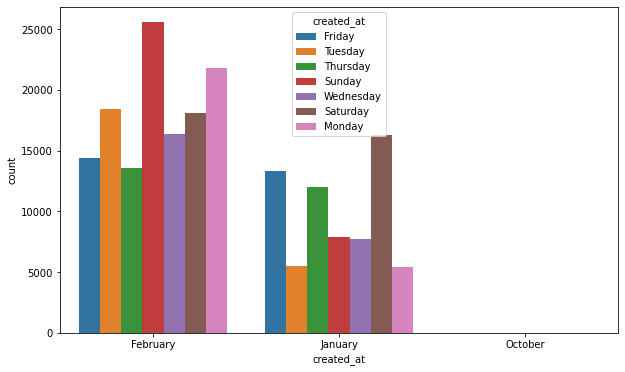

In [20]:
plt.figure(figsize=(10, 6)) 
sns.countplot(df['created_at'].dt.month_name(),hue=df['created_at'].dt.day_name())
plt.show()

In [21]:
df['store_primary_category'].nunique()

74

In [22]:
df['store_primary_category'].value_counts()

american             19346
pizza                17274
mexican              17050
burger               10933
sandwich             10037
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: store_primary_category, Length: 74, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


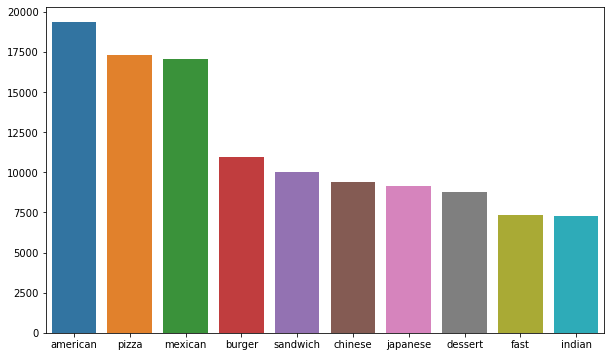

In [23]:
plt.figure(figsize=(10, 6)) 
sns.barplot(df['store_primary_category'].value_counts()[:10].index,df['store_primary_category'].value_counts()[:10].values)
plt.show()

In [24]:
df['store_primary_category'].groupby(df['market_id']).nunique()

market_id
1.0    70
2.0    64
3.0    65
4.0    65
5.0    59
6.0    62
Name: store_primary_category, dtype: int64

In [25]:
df['order_protocol'].value_counts()

1.0    54592
3.0    53065
5.0    44159
2.0    23985
4.0    19313
6.0      793
7.0       19
Name: order_protocol, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_protocol', ylabel='count'>

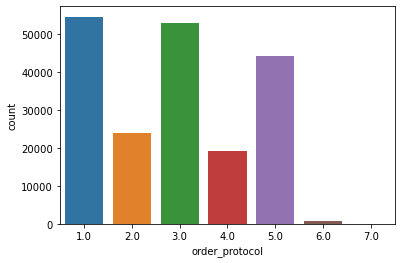

In [26]:
sns.countplot(df['order_protocol'])

<AxesSubplot:xlabel='total_items', ylabel='Density'>

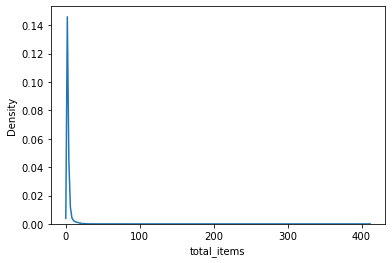

In [27]:
sns.kdeplot(df['total_items'])

<AxesSubplot:xlabel='market_id'>

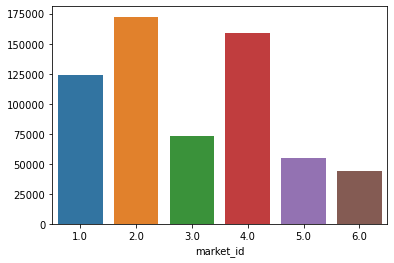

In [28]:
sns.barplot(x=df['total_items'].groupby(df['market_id']).sum().index,y=df['total_items'].groupby(df['market_id']).sum().values)

<AxesSubplot:xlabel='market_id'>

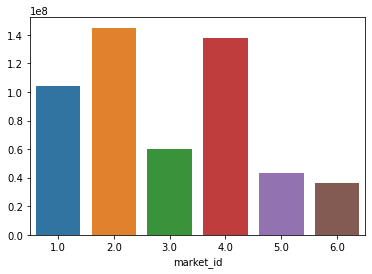

In [29]:
sns.barplot(x=df['subtotal'].groupby(df['market_id']).sum().index,y=df['subtotal'].groupby(df['market_id']).sum().values)

<AxesSubplot:xlabel='min_item_price', ylabel='Density'>

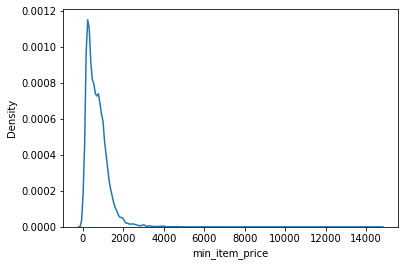

In [30]:
sns.kdeplot(df['min_item_price'])

<AxesSubplot:xlabel='max_item_price', ylabel='Density'>

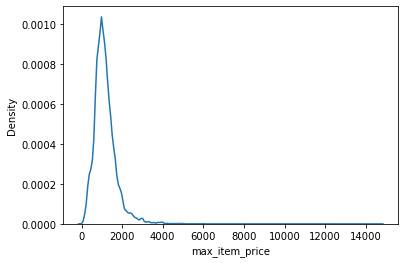

In [31]:
sns.kdeplot(df['max_item_price'])

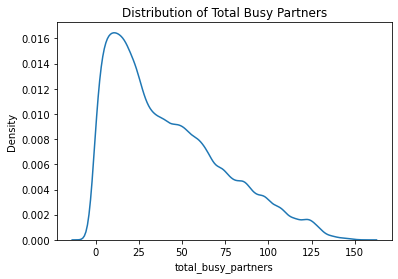

In [32]:
sns.kdeplot(df['total_busy_partners'])
plt.title('Distribution of Total Busy Partners')
plt.show()

<ipython-input-33-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot:>

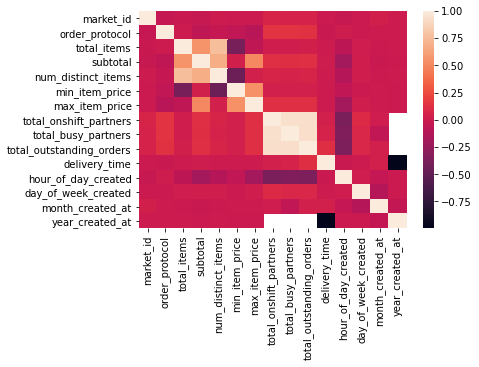

In [33]:
sns.heatmap(df.corr())

### Outliers detections

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_item_price'>

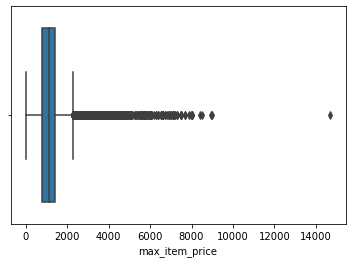

In [34]:
sns.boxplot(df['max_item_price'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_item_price'>

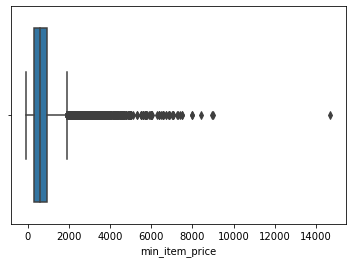

In [35]:
sns.boxplot(df['min_item_price'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subtotal'>

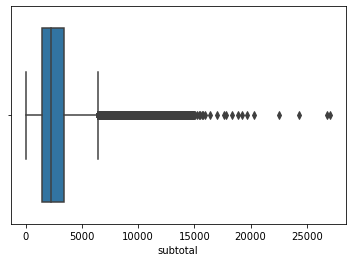

In [36]:
sns.boxplot(df['subtotal'])

### Split data

In [37]:
#Drop featuers
df.drop(columns=['created_at','actual_delivery_time'],inplace=True)

In [38]:
#Split based on market id
train_temp_df,test_df = train_test_split(df, test_size=0.10,stratify=df[['market_id']])
X_train, val_df = train_test_split(train_temp_df, test_size=0.15,stratify=train_temp_df[['market_id']])

In [39]:
X_train.shape

(150271, 17)

In [40]:
test_df.shape

(19644, 17)

In [41]:
val_df.shape

(26519, 17)

### Null values handlling

In [42]:
total_onshift_partners_median = np.nanmedian(X_train['total_onshift_partners'])
 
total_busy_partners_median = np.nanmedian(X_train['total_busy_partners'])

total_outstanding_orders_median = np.nanmedian(X_train['total_outstanding_orders'])

X_train['total_onshift_partners']= np.where(X_train['total_onshift_partners'].isna(), total_onshift_partners_median, X_train['total_onshift_partners'])

X_train['total_busy_partners']= np.where(X_train['total_busy_partners'].isna(), total_busy_partners_median, X_train['total_busy_partners'])

X_train['total_outstanding_orders']= np.where(X_train['total_outstanding_orders'].isna(), total_outstanding_orders_median, X_train['total_outstanding_orders'])

### Target Encoding

In [43]:
categorical_columns=['market_id', 'store_id', 'store_primary_category','order_protocol', 'day_of_week_created', 'month_created_at', 'year_created_at', 'hour_of_day_created']

In [44]:
encoder = ce.TargetEncoder(cols = categorical_columns, handle_missing = 'median') 
encoder.fit( X = X_train[categorical_columns], y = X_train['delivery_time'])
X_train[categorical_columns] = encoder.transform(X_train[categorical_columns]) 

In [45]:
for i in X_train.columns:
    print(i,"--------------->",sum(X_train[i].isna()),"Null values")
    

market_id ---------------> 0 Null values
store_id ---------------> 0 Null values
store_primary_category ---------------> 0 Null values
order_protocol ---------------> 0 Null values
total_items ---------------> 0 Null values
subtotal ---------------> 0 Null values
num_distinct_items ---------------> 0 Null values
min_item_price ---------------> 0 Null values
max_item_price ---------------> 0 Null values
total_onshift_partners ---------------> 0 Null values
total_busy_partners ---------------> 0 Null values
total_outstanding_orders ---------------> 0 Null values
delivery_time ---------------> 0 Null values
hour_of_day_created ---------------> 0 Null values
day_of_week_created ---------------> 0 Null values
month_created_at ---------------> 0 Null values
year_created_at ---------------> 0 Null values


In [46]:
y_Train=X_train['delivery_time']
X_train.drop(columns=['delivery_time'],inplace=True)

In [47]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X_train)
Xtrain_standardized_df = pd.DataFrame(standardized_data, columns=X_train.columns)

### Scaling and outliers removal [3,-3] z-values  before and after

In [48]:

outliers_mask=(np.abs(Xtrain_standardized_df) > 3).any(axis=1)
Xtrain_standardized_df['delivery_time']=y_Train.tolist()
Xtrain_standardized_df_no_out = Xtrain_standardized_df[~outliers_mask]

In [49]:
Xtrain_standardized_df_no_out['max_item_price'].max()

2.967375470913495

In [50]:
y_Train=Xtrain_standardized_df_no_out['delivery_time'].tolist()
Xtrain_std=Xtrain_standardized_df_no_out.drop(columns=['delivery_time'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_item_price'>

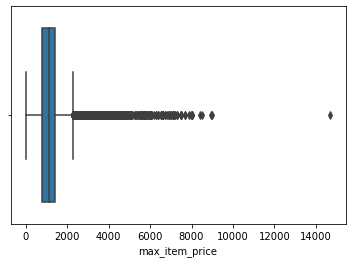

In [51]:
sns.boxplot(df['max_item_price'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_item_price'>

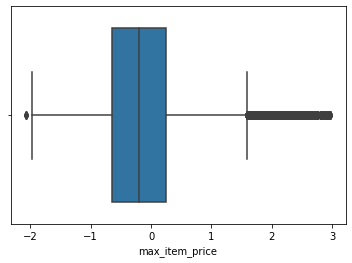

In [52]:
sns.boxplot(Xtrain_standardized_df_no_out['max_item_price'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_item_price'>

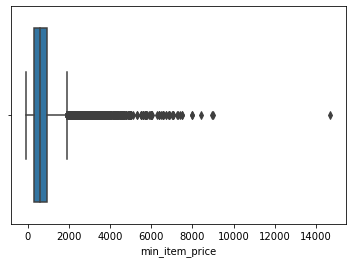

In [53]:
sns.boxplot(df['min_item_price'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_item_price'>

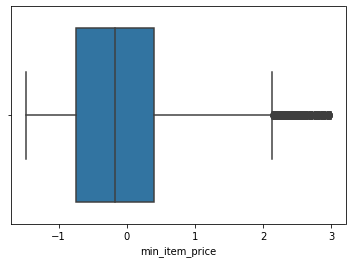

In [54]:
sns.boxplot(Xtrain_standardized_df_no_out['min_item_price'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subtotal'>

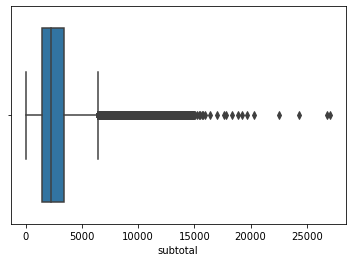

In [55]:
sns.boxplot(df['subtotal'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subtotal'>

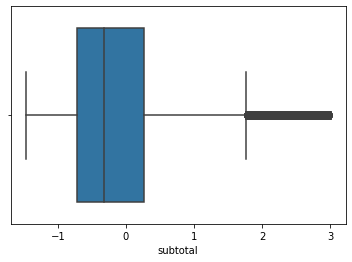

In [56]:
sns.boxplot(Xtrain_standardized_df_no_out['subtotal'])

### Preprocess of validation data

In [57]:
val_df.dropna(subset=["market_id"],inplace=True)
val_df['total_onshift_partners']= np.where(val_df['total_onshift_partners'].isna(), total_onshift_partners_median, val_df['total_onshift_partners'])
val_df['total_busy_partners']= np.where(val_df['total_busy_partners'].isna(), total_busy_partners_median, val_df['total_busy_partners'])
val_df['total_outstanding_orders']= np.where(val_df['total_outstanding_orders'].isna(), total_outstanding_orders_median, val_df['total_outstanding_orders'])
val_df.loc[:, categorical_columns] = encoder.transform(val_df[categorical_columns])
y_vald=val_df['delivery_time'].tolist()
val_df.drop(columns=['delivery_time'],inplace=True)
xval_std=scaler.transform(val_df)
x_val_std = pd.DataFrame(xval_std, columns=val_df.columns)

<ipython-input-57-29cc50b66391>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  val_df.loc[:, categorical_columns] = encoder.transform(val_df[categorical_columns])


In [58]:
x_val_std

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour_of_day_created,day_of_week_created,month_created_at,year_created_at
0,-0.715133,-0.297462,-0.805619,-0.104170,0.297925,-0.411916,0.817400,-0.807478,-0.896643,-0.216464,-0.295389,-0.289294,-1.255860,-1.135928,0.015152,-0.00258
1,2.011379,-0.044335,0.074460,-0.104170,-0.807121,-0.949852,-1.024382,0.502243,-0.377516,-0.095676,-0.003529,-0.131277,-0.689385,0.415721,0.015152,-0.00258
2,-0.715133,-0.204664,-0.285447,-0.539753,0.666273,0.197781,1.431327,-0.876310,-0.468497,1.534968,1.423342,0.876083,1.039888,-1.240809,0.015152,-0.00258
3,-0.326467,-0.094179,-0.285447,-0.976103,-0.070424,0.389510,0.203473,-0.176518,0.380659,-0.035282,0.580191,-0.309047,0.044118,0.870296,-0.035926,-0.00258
4,2.011379,0.023229,-0.158544,1.494090,0.297925,-0.320982,0.817400,-1.122959,-0.646891,-1.061983,-1.008825,-0.842355,-0.832018,-1.240809,-0.035926,-0.00258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,-0.326467,-0.016997,-0.729160,-0.539753,-0.070424,0.008792,-0.410455,-0.119158,0.514455,0.357281,1.455771,0.224261,-0.750386,0.870296,-0.035926,-0.00258
26515,-0.275646,-0.010616,-0.314903,-0.976103,0.666273,2.060288,0.203473,0.882732,0.423474,-0.518435,-0.457534,-0.842355,1.039888,1.546502,0.015152,-0.00258
26516,-0.326467,0.193125,0.559896,-0.976103,2.508015,0.529198,1.431327,-0.931759,-1.001896,1.414180,1.553058,1.705673,1.039888,-1.240809,0.015152,-0.00258
26517,2.011379,-0.056174,-0.158544,1.494090,-0.070424,1.022215,0.203473,0.502243,1.228032,-0.005084,0.093757,-0.091773,1.039888,-0.465634,-0.035926,-0.00258


In [59]:
len(y_vald)

26519

### Preprocess of test data

In [60]:
test_df.dropna(subset=["market_id"],inplace=True)
test_df['total_onshift_partners']= np.where(test_df['total_onshift_partners'].isna(), total_onshift_partners_median, test_df['total_onshift_partners'])
test_df['total_busy_partners']= np.where(test_df['total_busy_partners'].isna(), total_busy_partners_median, test_df['total_busy_partners'])
test_df['total_outstanding_orders']= np.where(test_df['total_outstanding_orders'].isna(), total_outstanding_orders_median, test_df['total_outstanding_orders'])
test_df.loc[:, categorical_columns] = encoder.transform(test_df[categorical_columns])
y_test=test_df['delivery_time'].tolist()
test_df.drop(columns=['delivery_time'],inplace=True)
xtest_std=scaler.transform(test_df)
x_test_std = pd.DataFrame(xtest_std, columns=test_df.columns)

<ipython-input-60-e46f7d6e7f40>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_df.loc[:, categorical_columns] = encoder.transform(test_df[categorical_columns])


In [61]:
x_test_std

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour_of_day_created,day_of_week_created,month_created_at,year_created_at
0,-0.326467,-0.116663,-0.190953,-0.539753,-0.807121,-0.429445,-1.024382,2.318645,1.317229,1.021617,1.131482,0.915587,1.039888,-1.240809,0.015152,-0.00258
1,-0.573734,-0.045683,-0.158544,-0.104170,-0.070424,-0.734568,-0.410455,-0.719526,-1.151747,-1.031786,-1.041254,-0.941116,-0.733774,0.415721,-0.035926,-0.00258
2,2.011379,0.183929,0.355420,-0.539753,2.876364,3.070424,1.431327,-0.742470,0.423474,-0.035282,0.353189,-0.032517,0.638079,-1.135928,-0.035926,-0.00258
3,2.011379,-0.073674,-0.200437,-0.539753,-0.807121,0.334730,-1.024382,4.985889,3.805828,-0.186267,-0.133245,0.046492,0.638079,-0.693397,0.015152,-0.00258
4,-0.275646,0.097824,0.535163,1.494090,-0.807121,-0.867682,-1.024382,0.789044,-0.109925,0.206295,0.255902,-0.210286,0.638079,0.415721,-0.035926,-0.00258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19639,-0.573734,-0.309548,0.074460,-0.976103,-0.807121,-1.004631,-1.024382,0.311043,-0.555910,-1.273363,-1.235827,-1.059628,-0.688115,-1.240809,0.015152,-0.00258
19640,-0.573734,-0.127351,-0.158544,1.494090,-0.807121,-0.870421,-1.024382,0.779484,-0.118845,-0.427844,-0.392676,-0.388055,0.044118,-1.240809,0.015152,-0.00258
19641,-0.715133,-0.111815,0.355420,-0.976103,-0.438772,-0.441497,-0.410455,-0.360070,0.387795,1.202800,1.358484,1.034100,0.638079,-1.240809,0.015152,-0.00258
19642,-0.275646,-0.152737,-0.202594,1.494090,-0.438772,-0.648564,-1.024382,0.119843,-0.734305,-0.729815,-0.684536,-0.644833,-0.399279,-1.240809,0.015152,-0.00258


In [62]:
len(y_test)

19644

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score



In [64]:
n_estimators_list = [10, 50, 100]
max_depth_list = [None, 10, 20] 
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 4]

In [65]:
# best_mse = float('inf')
# best_rf_model = None
# best_hyperparameters = None
# c=1
# for n_estimators in n_estimators_list:
#     for max_depth in max_depth_list:
#         for min_samples_split in min_samples_split_list:
#             for min_samples_leaf in min_samples_leaf_list:
#                 rf_model = RandomForestRegressor(n_estimators=n_estimators,
#                                                  max_depth=max_depth,
#                                                  min_samples_split=min_samples_split,
#                                                  min_samples_leaf=min_samples_leaf,
#                                                  random_state=42)

#                 rf_model.fit(Xtrain_std, y_Train)
     
#                 y_pred = rf_model.predict(x_val_std)
#                 y_pred1 = rf_model.predict(Xtrain_std)

#                 mse = mean_squared_error(y_vald, y_pred)
#                 rmse = mean_squared_error(y_vald, y_pred, squared=False)
#                 mae = mean_absolute_error(y_vald, y_pred)
#                 mse1 = mean_squared_error(y_Train, y_pred1)
#                 r2_valid=r2_score(y_vald, y_pred)
#                 r2_train=r2_score(y_Train, y_pred1)
                
#                 print("model",c,"training_mse=",mse1,"---","validation_mse=",mse)
#                 print("model",c,"training_r2=",r2_train,"---","validation_r2=",r2_valid)
#                 print("n_estimators",n_estimators,"max_depth",max_depth,"min_samples_split",min_samples_split,"min_samples_leaf",min_samples_leaf)

#                 if mse < best_mse:
#                     print("BEST_TILL","n_estimators",n_estimators,"max_depth",max_depth,"min_samples_split",min_samples_split,"min_samples_leaf",min_samples_leaf)
#                     best_mse = mse
#                     best_rf_model = rf_model
#                     best_hyperparameters = {
#                         'n_estimators': n_estimators,
#                         'max_depth': max_depth,
#                         'min_samples_split': min_samples_split,
#                         'min_samples_leaf': min_samples_leaf
#                     }

#### From hyperparameter search we got best model

In [66]:
# n_estimators 100 max_depth None min_samples_split 10 min_samples_leaf 4
# BEST_TILL n_estimators 100 max_depth None min_samples_split 10 min_samples_leaf 4

In [67]:
rf_model = RandomForestRegressor(n_estimators=100,max_depth=None,min_samples_split=10,min_samples_leaf=4,random_state=42)

rf_model.fit(Xtrain_std, y_Train)
     


RandomForestRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42)

In [68]:
y_pred = rf_model.predict(x_val_std)
y_pred_train = rf_model.predict(Xtrain_std)

In [69]:
mse_valid = mean_squared_error(y_vald, y_pred)
rmse_valid = mean_squared_error(y_vald, y_pred, squared=False)
mae_valid = mean_absolute_error(y_vald, y_pred)
mse_train = mean_squared_error(y_Train, y_pred_train)
rmse_train = mean_squared_error(y_Train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_Train, y_pred_train)


In [70]:
r2_valid=r2_score(y_vald, y_pred)
r2_train=r2_score(y_Train, y_pred_train)

In [71]:
print(f"Mean Squared Error of Random Forest Model on Train Data = {mse_train}")
print(f"Root Mean Squared Error of Random Forest Model on Train Data = {rmse_train}")
print(f"Mean Absolute Error of Random Forest Model on Train Data = {mae_train}")
print(f"r2_score for Train data={r2_train}")

Mean Squared Error of Random Forest Model on Train Data = 117.12480926335436
Root Mean Squared Error of Random Forest Model on Train Data = 10.822421598854591
Mean Absolute Error of Random Forest Model on Train Data = 6.819230726342129
r2_score for Train data=0.6696767166559066


In [72]:
print(f"Mean Squared Error of Random Forest Model on validation Data = {mse_valid}")
print(f"Root Mean Squared Error of Random Forest Model on validation Data = {rmse_valid}")
print(f"Mean Absolute Error of Random Forest Model on validation Data = {mae_valid}")
print(f"r2_score for validation data={r2_valid}")

Mean Squared Error of Random Forest Model on validation Data = 262.1445601553247
Root Mean Squared Error of Random Forest Model on validation Data = 16.190878918555494
Mean Absolute Error of Random Forest Model on validation Data = 11.180418482916242
r2_score for validation data=0.2737286992557697


### Re-Training whole data set with valid+train

In [73]:
df1=pd.read_csv("dataset.csv")
df1['created_at'] = pd.to_datetime(df1['created_at'])
df1['actual_delivery_time'] = pd.to_datetime(df1['actual_delivery_time'])
df1['delivery_time'] = (df1['actual_delivery_time'] - df1['created_at']).dt.total_seconds() / 60.0
df1['hour_of_day_created'] = df1['created_at'].dt.hour
df1['day_of_week_created'] = df1['created_at'].dt.dayofweek
df1['month_created_at'] = df1['created_at'].dt.month
df1['year_created_at'] = df1['created_at'].dt.year
df1.drop(columns=['created_at','actual_delivery_time'],inplace=True)
df1.dropna(subset=['delivery_time'],inplace=True)
df1.dropna(subset=['market_id'],inplace=True)
X_train1, test_data1 = train_test_split(df1, test_size=0.15,stratify=df1[['market_id']])
total_onshift_partners_median1 = np.nanmedian(X_train1['total_onshift_partners'])
total_busy_partners_median1 = np.nanmedian(X_train1['total_busy_partners'])
total_outstanding_orders_median1 = np.nanmedian(X_train1['total_outstanding_orders'])
X_train1['total_onshift_partners']= np.where(X_train1['total_onshift_partners'].isna(), total_onshift_partners_median1, X_train1['total_onshift_partners'])
X_train1['total_busy_partners']= np.where(X_train1['total_busy_partners'].isna(), total_busy_partners_median1, X_train1['total_busy_partners'])
X_train1['total_outstanding_orders']= np.where(X_train1['total_outstanding_orders'].isna(), total_outstanding_orders_median1, X_train1['total_outstanding_orders'])
categorical_columns1=['market_id', 'store_id', 'store_primary_category','order_protocol', 'day_of_week_created', 'month_created_at', 'year_created_at', 'hour_of_day_created']
encoder1 = ce.TargetEncoder(cols = categorical_columns1, handle_missing = 'median') 
encoder1.fit( X = X_train1[categorical_columns1], y = X_train1['delivery_time'])
X_train1[categorical_columns1] = encoder1.transform(X_train1[categorical_columns1])
y_Train1=X_train1['delivery_time']
X_train1.drop(columns=['delivery_time'],inplace=True)
scaler1 = StandardScaler()
standardized_data1 = scaler1.fit_transform(X_train1)
Xtrain_standardized_df1 = pd.DataFrame(standardized_data1, columns=X_train1.columns)

outliers_mask1=(np.abs(Xtrain_standardized_df1) > 3).any(axis=1)
Xtrain_standardized_df1['delivery_time']=y_Train1.tolist()
Xtrain_standardized_df_no_out1 = Xtrain_standardized_df1[~outliers_mask1]
y_Train1=Xtrain_standardized_df_no_out1['delivery_time'].tolist()
Xtrain_std1=Xtrain_standardized_df_no_out1.drop(columns=['delivery_time'])




test_data1.dropna(subset=["market_id"],inplace=True)
test_data1['total_onshift_partners']= np.where(test_data1['total_onshift_partners'].isna(), total_onshift_partners_median1, test_data1['total_onshift_partners'])
test_data1['total_busy_partners']= np.where(test_data1['total_busy_partners'].isna(), total_busy_partners_median1, test_data1['total_busy_partners'])
test_data1['total_outstanding_orders']= np.where(test_data1['total_outstanding_orders'].isna(), total_outstanding_orders_median1, test_data1['total_outstanding_orders'])
test_data1.loc[:, categorical_columns1] = encoder1.transform(test_data1[categorical_columns1])
y_test1=test_data1['delivery_time'].tolist()
test_data1.drop(columns=['delivery_time'],inplace=True)
xtest_std1=scaler1.transform(test_data1)
x_test_std1 = pd.DataFrame(xtest_std1, columns=test_data1.columns)





<ipython-input-73-c6830db76f97>:42: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_data1.loc[:, categorical_columns1] = encoder1.transform(test_data1[categorical_columns1])


In [74]:
Xtrain_std1

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour_of_day_created,day_of_week_created,month_created_at,year_created_at
0,-0.562017,-0.137228,-0.105104,-0.416276,1.046144,0.822573,1.430488,-1.123713,0.782961,-0.699387,-0.749089,-0.605236,1.093807,0.927886,0.016466,-0.002447
1,-0.237171,-0.112381,-0.742175,-0.553459,-0.817710,-0.839837,-1.023951,0.587584,-0.297966,-0.065307,-0.003483,0.204733,1.093807,-0.696772,0.016466,-0.002447
2,-0.357420,0.058466,-0.722050,-0.553459,-0.072168,-0.264493,-0.410341,0.790717,-0.107636,-0.216278,-0.230407,-0.308906,1.093807,-1.244535,0.016466,-0.002447
4,2.011843,0.230735,-0.722050,-0.553459,0.673373,-0.304531,0.816878,-1.027896,0.208382,-1.333468,-1.332607,-1.118875,-0.418056,1.486175,0.016466,-0.002447
5,-0.347188,0.012401,-0.742175,-0.973225,-0.817710,-0.836547,-1.023951,0.480269,-0.375175,1.836936,1.617400,1.706140,1.093807,-1.244535,0.016466,-0.002447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166963,-0.347188,-0.255671,-0.470197,-0.553459,0.300602,0.567535,0.816878,0.208148,-0.554731,0.085665,0.093770,0.046690,-0.724427,-1.166421,-0.038134,-0.002447
166964,-0.711887,0.319202,-0.162277,-0.553459,-0.817710,-1.113524,-1.023951,-0.069722,-0.913843,-0.518221,0.450364,-0.545970,-0.418056,0.927886,-0.038134,-0.002447
166965,-0.357420,0.024427,-0.053865,1.469213,0.673373,1.269576,-1.023951,0.599083,-0.287192,-0.216278,-0.230407,-0.308906,-0.884317,1.486175,-0.038134,-0.002447
166966,2.011843,0.074742,-0.288812,-0.973225,-0.444939,-0.049493,-0.410341,0.974687,0.244293,0.206442,0.320693,0.066446,0.064853,0.456299,0.016466,-0.002447


In [75]:
len(y_Train1)

149724

In [76]:
x_test_std1

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour_of_day_created,day_of_week_created,month_created_at,year_created_at
0,-0.562017,-0.279527,-0.841385,1.469213,0.300602,-0.540373,0.203269,-1.171622,-1.272954,0.357414,0.417946,0.580085,0.699210,0.927886,0.016466,-0.002447
1,-0.347188,0.040864,-0.189942,-0.553459,-0.444939,-0.488269,-0.410341,0.016513,-0.114819,-0.488027,-0.327660,-0.545970,2.599374,0.927886,0.016466,-0.002447
2,-0.237171,0.305210,-0.053865,-0.040079,-0.444939,-0.351151,-0.410341,0.591417,-0.204597,-0.850359,-0.943595,-0.881811,-0.418056,1.486175,0.016466,-0.002447
3,-0.347188,0.146598,-0.002100,-0.553459,0.300602,-0.484429,0.203269,-0.167456,-1.005416,-1.061719,-1.008431,-0.881811,-0.724427,-1.166421,-0.038134,-0.002447
4,-0.347188,0.215240,0.439176,-0.553459,0.300602,0.348696,0.816878,-0.263274,0.574676,0.266831,0.255858,-0.012576,-1.308557,0.456299,0.016466,-0.002447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29461,-0.237171,-0.046219,-0.742175,1.469213,-0.072168,-0.363766,0.203269,-0.569889,-0.646304,-1.091914,-1.202937,-1.059609,0.064853,-1.244535,-0.038134,-0.002447
29462,-0.347188,-0.165148,0.198879,-0.973225,-0.072168,0.586731,-1.023951,1.080086,0.163493,1.353827,1.422894,2.121002,-0.724427,-0.696772,0.016466,-0.002447
29463,-0.562017,-0.032812,0.439176,1.469213,-0.444939,0.338823,-0.410341,0.982352,1.687923,-1.001331,-1.040848,-0.941077,-1.308557,1.486175,0.016466,-0.002447
29464,-0.237171,0.213545,0.439176,-0.040079,-0.444939,0.574665,-0.410341,1.135660,1.508367,-0.035112,-0.003483,-0.289150,1.093807,0.456299,0.016466,-0.002447


In [77]:
len(y_test1)

29466

In [78]:
rf_model = RandomForestRegressor(n_estimators=100,max_depth=None,min_samples_split=10,min_samples_leaf=4,random_state=42)

rf_model.fit(Xtrain_std1, y_Train1)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42)

In [79]:
y_pred1 = rf_model.predict(x_test_std1)
y_pred_train1 = rf_model.predict(Xtrain_std1)
mse_valid1 = mean_squared_error(y_test1, y_pred1)
rmse_valid1 = mean_squared_error(y_test1, y_pred1, squared=False)
mae_valid1 = mean_absolute_error(y_test1, y_pred1)
mse_train1 = mean_squared_error(y_Train1, y_pred_train1)
rmse_train1 = mean_squared_error(y_Train1, y_pred_train1, squared=False)
mae_train1 = mean_absolute_error(y_Train1, y_pred_train1)
r2_valid1=r2_score(y_test1, y_pred1)
r2_train1=r2_score(y_Train1, y_pred_train1)

In [80]:
print(f"Mean Squared Error of Random Forest Model on Train Data = {mse_train1}")
print(f"Root Mean Squared Error of Random Forest Model on Train Data = {rmse_train1}")
print(f"Mean Absolute Error of Random Forest Model on Train Data = {mae_train1}")
print(f"r2_score for Train data={r2_train1}")

Mean Squared Error of Random Forest Model on Train Data = 114.51267780725021
Root Mean Squared Error of Random Forest Model on Train Data = 10.701059658148356
Mean Absolute Error of Random Forest Model on Train Data = 6.828117377007429
r2_score for Train data=0.6741279144299959


In [81]:
print(f"Mean Squared Error of Random Forest Model on TEST Data = {mse_valid1}")
print(f"Root Mean Squared Error of Random Forest Model on TEST Data = {rmse_valid1}")
print(f"Mean Absolute Error of Random Forest Model on TEST Data = {mae_valid1}")
print(f"r2_score for TEST data={r2_valid1}")

Mean Squared Error of Random Forest Model on TEST Data = 318.14754791535023
Root Mean Squared Error of Random Forest Model on TEST Data = 17.836691058471306
Mean Absolute Error of Random Forest Model on TEST Data = 11.145229181537305
r2_score for TEST data=0.2489742577682743


In [82]:
#all imports
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os
import datetime 
from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Dense, Input, Activation, Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import glorot_uniform,HeNormal,random_normal
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
def create_model():

    input_layer = tf.keras.Input(shape=(16,))

    dense1 = Dense(512, activation="relu",kernel_initializer=random_normal())(input_layer)

    dense2 = Dense(1024, activation="tanh",kernel_initializer=random_normal())(dense1)

    dense3 = Dense(512, activation="tanh",kernel_initializer=random_normal())(dense2)
    
    dense4 = Dense(512, activation="tanh",kernel_initializer=random_normal())(dense3)

    dense5 = Dense(64, activation="relu",kernel_initializer=random_normal())(dense4)
    
    dense6 = Dense(32, activation="relu",kernel_initializer=random_normal())(dense5)

    dense_output = Dense(1, activation = 'linear')(dense5)

    model = tf.keras.Model(inputs = input_layer, outputs = dense_output)

    return model

In [84]:
def r2_score1(y_true, y_pred):

  SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
  SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
  return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

In [85]:
model=create_model()
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error',r2_score1])

In [86]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 512)               8704      
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65    

In [87]:
def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 10
    if epoch % decay_step == 0 and epoch > 0:
        return lr * decay_rate
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)



epochs = 30
batch_size =128

history = model.fit(
    Xtrain_std.values,
    np.array(y_Train),
    batch_size=batch_size,
    epochs=epochs,
#     validation_split = 0.2
    validation_data=(x_val_std.values, np.array(y_vald)),
    callbacks=[lr_callback]
    
)

Epoch 1/30
1053/1053 [==============================] - 151s 142ms/step - loss: 371.5961 - mean_squared_error: 371.5961 - r2_score1: -0.0672 - val_loss: 274.6658 - val_mean_squared_error: 274.6658 - val_r2_score1: 0.2502 - lr: 1.0000e-04
Epoch 2/30
1053/1053 [==============================] - 27s 26ms/step - loss: 260.0625 - mean_squared_error: 260.0625 - r2_score1: 0.2751 - val_loss: 271.2667 - val_mean_squared_error: 271.2667 - val_r2_score1: 0.2557 - lr: 1.0000e-04
Epoch 3/30
1053/1053 [==============================] - 25s 23ms/step - loss: 256.1414 - mean_squared_error: 256.1414 - r2_score1: 0.2880 - val_loss: 264.5615 - val_mean_squared_error: 264.5615 - val_r2_score1: 0.2784 - lr: 1.0000e-04
Epoch 4/30
1053/1053 [==============================] - 26s 25ms/step - loss: 254.6465 - mean_squared_error: 254.6465 - r2_score1: 0.2922 - val_loss: 263.4759 - val_mean_squared_error: 263.4759 - val_r2_score1: 0.2791 - lr: 1.0000e-04
Epoch 5/30
1053/1053 [==============================] - 2

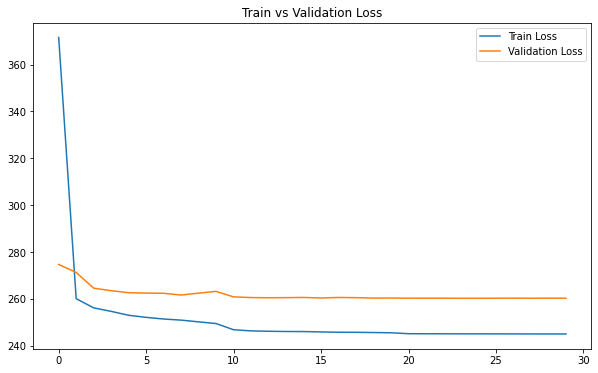

In [88]:
plt.rcParams["figure.figsize"] = (10,6)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']
epochs = len(history.history['loss'])

plt.plot(list(range(epochs)), train_loss, label = 'Train Loss')
plt.plot(list(range(epochs)), val_loss, label = 'Validation Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

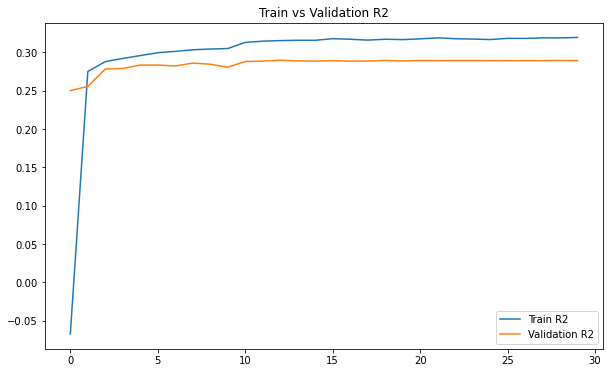

In [89]:
plt.rcParams["figure.figsize"] = (10,6)

train_R2 = history.history['r2_score1']
val_R2 = history.history['val_r2_score1']

epochs = len(history.history['loss'])

plt.plot(list(range(epochs)), train_R2, label = 'Train R2')
plt.plot(list(range(epochs)), val_R2, label = 'Validation R2')
plt.title('Train vs Validation R2')
plt.legend()
plt.show()

In [90]:
test_y_pred = model.predict(x_test_std.values) 
test_y_pred = np.squeeze(test_y_pred, axis = 1)

nn_mse = mean_squared_error(np.array(y_test), test_y_pred)
nn_rmse = mean_squared_error(np.array(y_test), test_y_pred, squared=False)
nn_mae = mean_absolute_error(np.array(y_test), test_y_pred)

print("R2_score",r2_score(np.array(y_test),test_y_pred))

print(f"Mean Squared Error of Neural Net Model on Test Data = {nn_mse}")
print(f"Root Mean Squared Error of Neural Net Model on Test Data = {nn_rmse}")
print(f"Mean Absolute Error of Neural Net Model on Test Data = {nn_mae}")

R2_score 0.223392547502693
Mean Squared Error of Neural Net Model on Test Data = 360.3552271653025
Root Mean Squared Error of Neural Net Model on Test Data = 18.983024710654057
Mean Absolute Error of Neural Net Model on Test Data = 11.421446302745748


In [91]:
model1=create_model()
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model1.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error',r2_score1])

In [92]:
def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 10
    if epoch % decay_step == 0 and epoch > 0:
        return lr * decay_rate
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)



epochs = 30
batch_size =64

history = model1.fit(
    Xtrain_std1.values,
    np.array(y_Train1),
    batch_size=batch_size,
    epochs=epochs,
#     validation_split = 0.2,
    validation_data=(x_val_std.values, np.array(y_vald)),
    callbacks=[lr_callback]
    
)

Epoch 1/30
2340/2340 [==============================] - 47s 20ms/step - loss: 291.9798 - mean_squared_error: 291.9798 - r2_score1: 0.1686 - val_loss: 269.2319 - val_mean_squared_error: 269.2319 - val_r2_score1: 0.2595 - lr: 0.0010
Epoch 2/30
2340/2340 [==============================] - 45s 19ms/step - loss: 258.1982 - mean_squared_error: 258.1982 - r2_score1: 0.2647 - val_loss: 267.3430 - val_mean_squared_error: 267.3430 - val_r2_score1: 0.2660 - lr: 0.0010
Epoch 3/30
2340/2340 [==============================] - 47s 20ms/step - loss: 256.4707 - mean_squared_error: 256.4707 - r2_score1: 0.2716 - val_loss: 268.4615 - val_mean_squared_error: 268.4615 - val_r2_score1: 0.2605 - lr: 0.0010
Epoch 4/30
2340/2340 [==============================] - 47s 20ms/step - loss: 254.6408 - mean_squared_error: 254.6408 - r2_score1: 0.2763 - val_loss: 279.2608 - val_mean_squared_error: 279.2608 - val_r2_score1: 0.2167 - lr: 0.0010
Epoch 5/30
2340/2340 [==============================] - 46s 20ms/step - loss

In [94]:
test_y_pred = model1.predict(x_test_std1.values) 
test_y_pred = np.squeeze(test_y_pred, axis = 1)

nn_mse = mean_squared_error(np.array(y_test1), test_y_pred)
nn_rmse = mean_squared_error(np.array(y_test1), test_y_pred, squared=False)
nn_mae = mean_absolute_error(np.array(y_test1), test_y_pred)

print("R2_score",r2_score(np.array(y_test1),test_y_pred))

print(f"Mean Squared Error of Neural Net Model on Test Data = {nn_mse}")
print(f"Root Mean Squared Error of Neural Net Model on Test Data = {nn_rmse}")
print(f"Mean Absolute Error of Neural Net Model on Test Data = {nn_mae}")

R2_score 0.24692833100431866
Mean Squared Error of Neural Net Model on Test Data = 319.01423802537585
Root Mean Squared Error of Neural Net Model on Test Data = 17.86096968323321
Mean Absolute Error of Neural Net Model on Test Data = 11.115676028292794


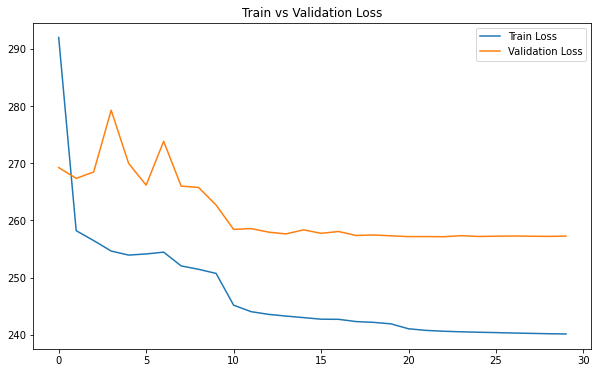

In [96]:
plt.rcParams["figure.figsize"] = (10,6)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']
epochs = len(history.history['loss'])

plt.plot(list(range(epochs)), train_loss, label = 'Train Loss')
plt.plot(list(range(epochs)), val_loss, label = 'Validation Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

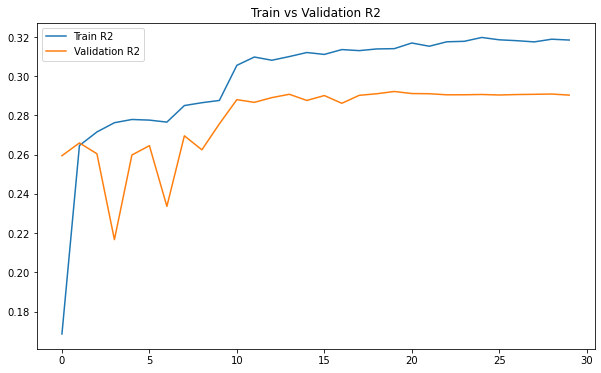

In [97]:
plt.rcParams["figure.figsize"] = (10,6)

train_R2 = history.history['r2_score1']
val_R2 = history.history['val_r2_score1']

epochs = len(history.history['loss'])

plt.plot(list(range(epochs)), train_R2, label = 'Train R2')
plt.plot(list(range(epochs)), val_R2, label = 'Validation R2')
plt.title('Train vs Validation R2')
plt.legend()
plt.show()

### Questionare 

Defining the problem statements and where can this and modifications of this be used?
    Solution - Here the problem Statement is to estimate the Delivery time, which is a regression problem. 
    A modified version of this can be used to Estimate Number of Orders in coming days, Predicting Seasonal Trend, and can also be used in Inventory Management.
    
    List 3 functions the pandas datetime provides with one line explanation.
    Solution -
    pd.to_datetime()  - Converts a string to pandas DateTimeIndex.
    dt.year - Extracts year from data which is in panadas DateTimeIndex format
    dt.month - Extracts month from data which is in panadas DateTimeIndex format
    dt.day - Extracts day form data which is in panadas DateTimeIndex format
    dt.weekday - Extracts weekday from data which is in panadas DateTimeIndex format
    
    Short note on datetime, timedelta, time span (period)
    datetime - Can be used to convert a series or list-like object to a pandas DateTimeIndex, so that we can extract information like year, month, day, weekday etc
    timedelta -  Converts a series or list-like object to a pandas TimedeltaIndex, which represents a duration or time interval. Using this we can add or substract time 
    time span - It is nothing but the time period, it can be in days, weeks, months etc.
    
    Why do we need to check for outliers in our data?
    Its important because outliers will effect the model parameters and hence cause more errors while predictions
    This might also prevent the model from attaining the global minima.
    Its very important to remove outliers before doing normalization because they get majorly impacted.
    
    Name 3 outlier removal methods?
    1. Z Score method - All the datapoints which have z score greater than 2.5  or 3 can be considered as outlier, because they a datapoint with high z score means it lies far away from the mean.
    2. IQR Method - A datapoint which is greater than 1.5 times the IQR + 75th percentile or smaller than 25th percentile - 1.5 times the IQR, can be coinsidered as an outlier. 3 can also be used instead of 1.5 depending upon the data.
    3. Visualization - It can be a great and simple way of identifying outlier data, like using Box Plots and Scatter plots.
    4. We can also use achine learning techniques like LOF (Local Outlier Factor) to identify outliers
    
    What classical machine learning methods can we use other than random forest for regression?
    Other regression models which we can use are - Linear Regression, K Nearest Neighbours, Decision Tree, Gradient Boosting Decision Tree, XGBoost are some of the other moethods which can be used.
    
    Why is scaling required for neural networks?
    Scaling is very essential to have proper and quick convergence. If scaling is not done properly, the optimization technique might give more importance to certain features. If the scale is too large or small it might also result in exploding or vanisihing gradients. 
    
    Briefly explain your choice of optimizer.
    I choose to use ADAM optimizer over RMSprop and SGD with momentum, because it is like the combined version of both these optimizers. ADAM also uses momentum along with adaptive learning due to which it out performs these most of the times.
    
    Which activation function did you use and why?
    In the hidden layers I used ReLu and tanh activation function, because it has the least chance of vanishing gradients.
    For output I used Linear activation function, because its a regression problem.
    
    Why does a neural network perform well on a large dataset?
    Neural Networks have huge number of trainable parameters, hence its important to have large dataset to avoid overfitting and better parameter estimation.